In [50]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\sopon\OneDrive\telecom.csv")

In [51]:
df.columns

Index(['Bearer Id', ' Start', ' Start ms', ' End', ' End ms', ' Dur. (ms)',
       ' IMSI', ' MSISDN/Number', ' IMEI', ' Last Location Name',
       ' Avg RTT DL (ms)', ' Avg RTT UL (ms)', ' Avg Bearer TP DL (kbps)',
       ' Avg Bearer TP UL (kbps)', ' TCP DL Retrans. Vol (Bytes)',
       ' TCP UL Retrans. Vol (Bytes)', ' DL TP < 50 Kbps (%)',
       ' 50 Kbps < DL TP < 250 Kbps (%)', ' 250 Kbps < DL TP < 1 Mbps (%)',
       ' DL TP > 1 Mbps (%)', ' UL TP < 10 Kbps (%)',
       ' 10 Kbps < UL TP < 50 Kbps (%)', ' 50 Kbps < UL TP < 300 Kbps (%)',
       ' UL TP > 300 Kbps (%)', ' HTTP DL (Bytes)', ' HTTP UL (Bytes)',
       ' Activity Duration DL (ms)', ' Activity Duration UL (ms)',
       ' Dur. (ms).1', ' Handset Manufacturer', ' Handset Type',
       ' Nb of sec with 125000B < Vol DL',
       ' Nb of sec with 1250B < Vol UL < 6250B',
       ' Nb of sec with 31250B < Vol DL < 125000B',
       ' Nb of sec with 37500B < Vol UL',
       ' Nb of sec with 6250B < Vol DL < 31250B',
       

In [84]:
df[' Avg RTT DL (ms)'] = pd.to_numeric(df[' Avg RTT DL (ms)'], errors='coerce')
df[' Avg RTT UL (ms)'] = pd.to_numeric(df[' Avg RTT UL (ms)'], errors='coerce')
df[' TCP DL Retrans. Vol (Bytes)'] = pd.to_numeric(df[' TCP DL Retrans. Vol (Bytes)'], errors='coerce')
df[' TCP UL Retrans. Vol (Bytes)'] = pd.to_numeric(df[' TCP UL Retrans. Vol (Bytes)'], errors='coerce')

In [85]:
cols = [' MSISDN/Number', ' Avg RTT DL (ms)', ' Avg RTT UL (ms)', ' Avg Bearer TP DL (kbps)', ' Avg Bearer TP UL (kbps)',' TCP DL Retrans. Vol (Bytes)',
       ' TCP UL Retrans. Vol (Bytes)', ' Handset Type']

In [86]:
def percent_missing(df):
        totalCells = np.prod(df.shape)
        missingCount = df.isnull().sum()
        totalMissing = missingCount.sum()
        return round((totalMissing/totalCells), 2) * 100, missingCount
    
percent, missing_count = percent_missing(df[cols])

In [87]:
missing_count

 MSISDN/Number                   1165
 Avg RTT DL (ms)                27928
 Avg RTT UL (ms)                27911
 Avg Bearer TP DL (kbps)          100
 Avg Bearer TP UL (kbps)          100
 TCP DL Retrans. Vol (Bytes)    88245
 TCP UL Retrans. Vol (Bytes)    96748
 Handset Type                      99
dtype: int64

Focus on network parameters ie TCP retransmission, Round Trip Time (RTT), Throughput

In [88]:
df[cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150100 entries, 0 to 150099
Data columns (total 8 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    MSISDN/Number                148935 non-null  float64
 1    Avg RTT DL (ms)              122172 non-null  float64
 2    Avg RTT UL (ms)              122189 non-null  float64
 3    Avg Bearer TP DL (kbps)      150000 non-null  float64
 4    Avg Bearer TP UL (kbps)      150000 non-null  float64
 5    TCP DL Retrans. Vol (Bytes)  61855 non-null   float64
 6    TCP UL Retrans. Vol (Bytes)  53352 non-null   float64
 7    Handset Type                 150001 non-null  object 
dtypes: float64(7), object(1)
memory usage: 9.2+ MB


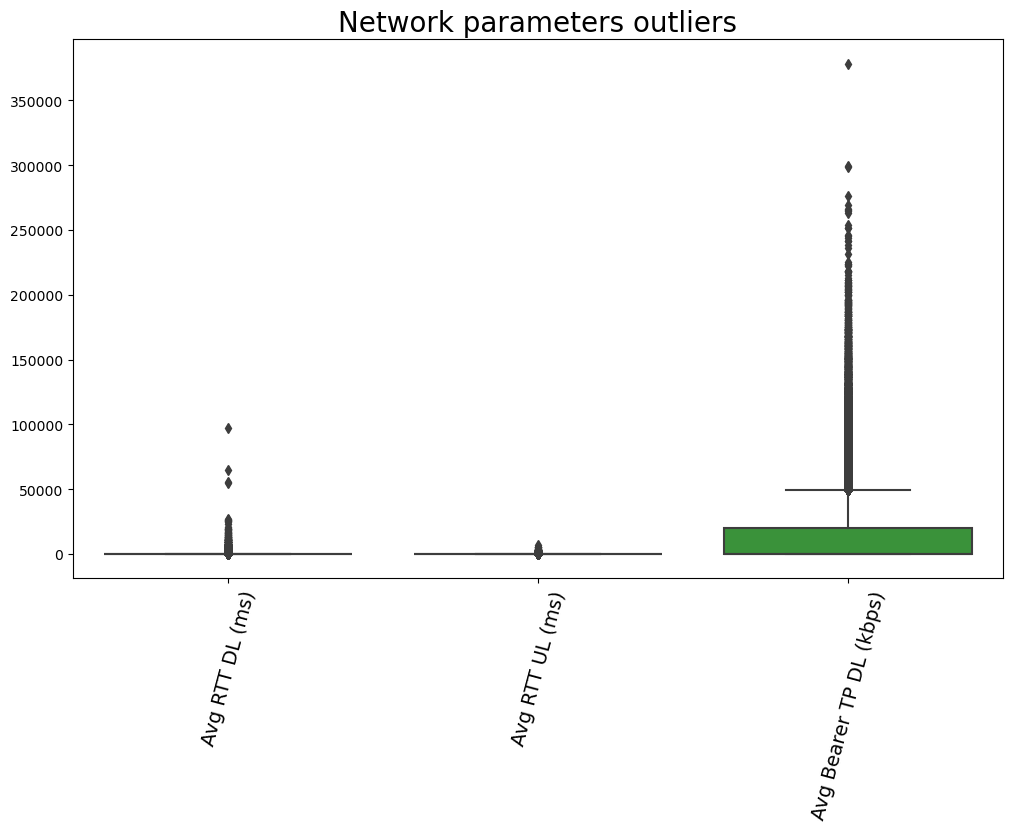

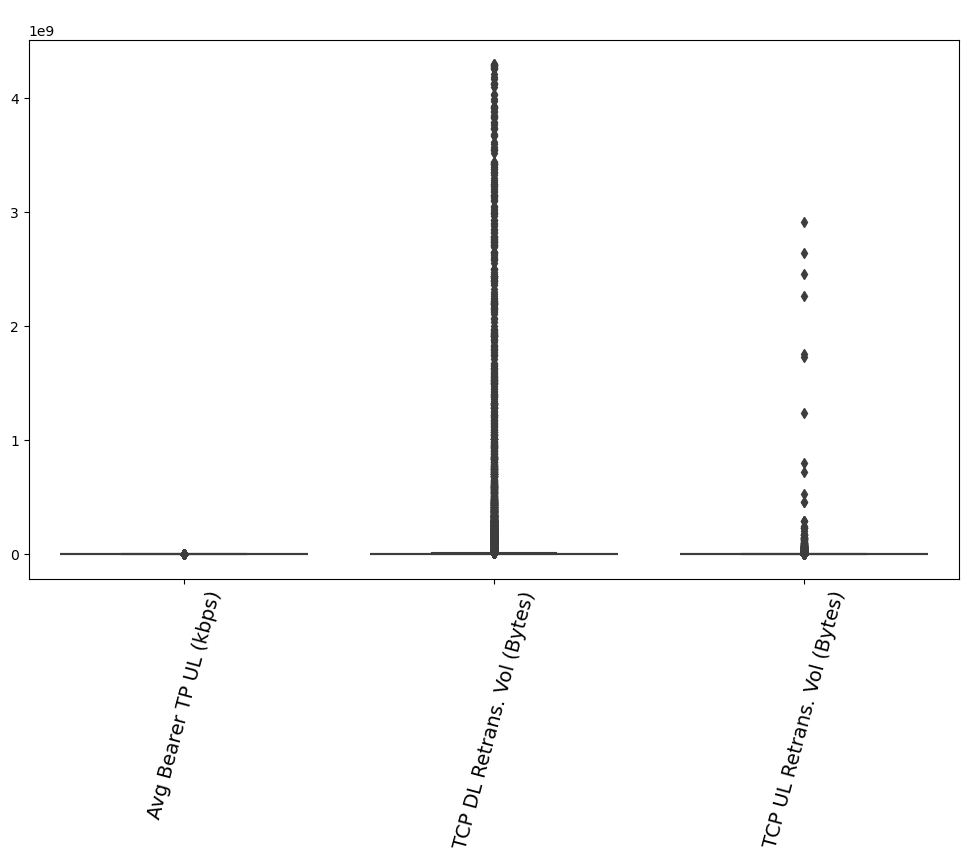

In [94]:
def plot_box(df, title) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.show()

plot_box(df[cols[1:4]], "Network parameters outliers")
plot_box(df[cols[4:7]], " ")

In [98]:
for col in cols:
    if(col!=' MSISDN/Number' and col != ' Handset Type'):
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        IQR=Q3-Q1
        Lower_Whisker = Q1-1.5*IQR
        Upper_Whisker = Q3+1.5*IQR
        df.loc[df[col] > Upper_Whisker, col] = df[col].mean()

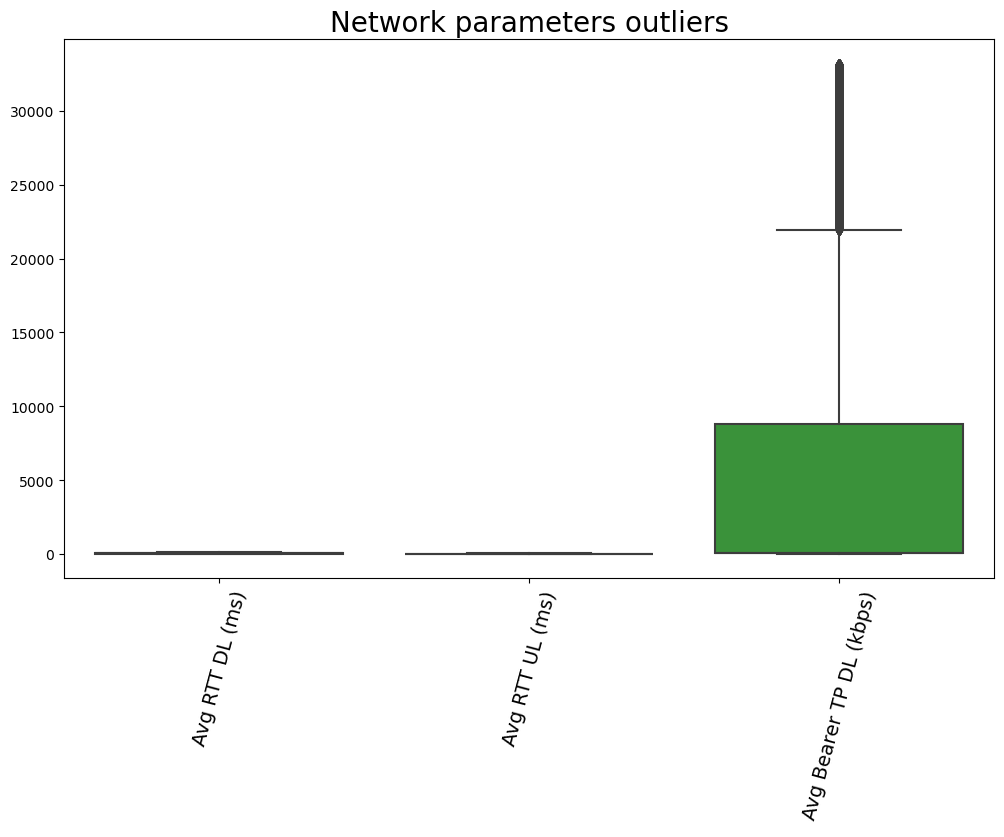

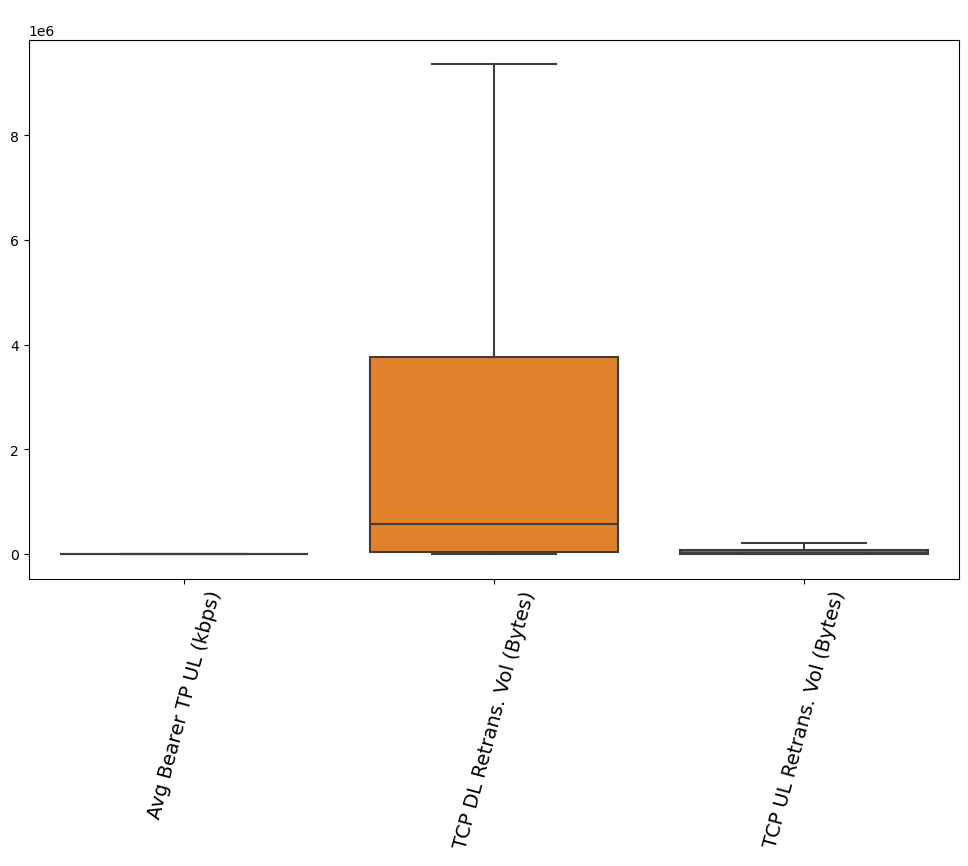

In [99]:
def plot_box(df, title) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.show()

plot_box(df[cols[1:4]], "Network parameters outliers")
plot_box(df[cols[4:7]], " ")

In [102]:
for i in cols:
    _, count = percent_missing(df[i])
    if count > 0:
        if df[i].dtype == 'object':
            df[i] = df[i].fillna(df[i].mode()[0])
        elif df[i].dtype == 'float64' and df[i].skew(axis=0) != 0:
            df[i] = df[i].fillna(df[i].mode()[0])
        elif df[i].dtype == 'float64' and df[i].skew(axis=0) == 0:
            df[i] = df[i].fillna(raw_df[i].mean())
            
percent, missing_count = percent_missing(df[cols])

In [103]:
missing_count

 MSISDN/Number                  0
 Avg RTT DL (ms)                0
 Avg RTT UL (ms)                0
 Avg Bearer TP DL (kbps)        0
 Avg Bearer TP UL (kbps)        0
 TCP DL Retrans. Vol (Bytes)    0
 TCP UL Retrans. Vol (Bytes)    0
 Handset Type                   0
dtype: int64

In [104]:
df[cols].columns

Index([' MSISDN/Number', ' Avg RTT DL (ms)', ' Avg RTT UL (ms)',
       ' Avg Bearer TP DL (kbps)', ' Avg Bearer TP UL (kbps)',
       ' TCP DL Retrans. Vol (Bytes)', ' TCP UL Retrans. Vol (Bytes)',
       ' Handset Type'],
      dtype='object')

Top 10 TCP values

In [106]:
df['Total_TCP'] = df[' TCP DL Retrans. Vol (Bytes)'] + df[' TCP UL Retrans. Vol (Bytes)']
df['Total_RTT'] = df[' Avg RTT DL (ms)'] + df[' Avg RTT UL (ms)']
df['Total_TP'] = df[' Avg Bearer TP DL (kbps)'] + df[' Avg Bearer TP UL (kbps)']

In [107]:
tcp = df.sort_values(by=['Total_TCP'], ascending=False)
tcp[cols].head(10)

,MSISDN/Number,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Handset Type
34585,3.366612e+10,120.000000,33.000000,7944.081085,1770.428647,9339354.0,199408.000000,Huawei E5180
37305,3.366791e+10,109.795706,29.000000,27835.000000,1475.000000,9329933.0,198070.000000,Huawei E5180
149228,3.365859e+10,73.000000,28.000000,13300.045927,1770.428647,9346708.0,164535.000000,Huawei B528S-23A
139831,4.188282e+10,74.000000,25.000000,28232.000000,1770.428647,9354511.0,152668.000000,Huawei B528S-23A
140236,3.366015e+10,49.000000,17.662883,13300.045927,1774.000000,9310489.0,196414.000000,Huawei B528S-23A
116304,3.369912e+10,72.000000,10.000000,7944.081085,1770.428647,9356205.0,143909.000000,Samsung Galaxy S8 (Sm-G950F)
78211,3.366525e+10,87.000000,34.000000,7944.081085,1770.428647,9365124.0,134463.023378,Huawei B528S-23A
22297,4.188282e+10,87.000000,2.000000,7944.081085,1770.428647,9357734.0,134463.023378,Apple iPhone 7 Plus (A1784)
137136,3.369818e+10,74.000000,30.000000,7944.081085,1770.428647,9307732.0,182466.000000,Huawei B528S-23A
39083,3.365851e+10,80.000000,31.000000,13300.045927,1770.428647,9353799.0,134463.023378,Huawei B528S-23A


Bottom 10 TCP values

In [108]:
tcp[cols].tail(10)

,MSISDN/Number,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Handset Type
12866,3.360783e+10,29.000000,3.000000,16242.000000,611.0,62.0,81.0,Apple iPhone 5C (A1529)
95964,3.362636e+10,34.000000,6.000000,10128.000000,836.0,92.0,42.0,Apple iPhone 7 (A1778)
83227,4.188282e+10,49.000000,10.000000,2158.000000,2645.0,92.0,42.0,undefined
99957,4.188282e+10,39.000000,2.000000,31540.000000,1037.0,38.0,91.0,Apple iPhone 8 (A1905)
8816,3.361478e+10,39.000000,25.000000,8498.000000,156.0,86.0,42.0,Huawei Ascend Mate7
97068,3.364108e+10,77.000000,4.000000,174.000000,77.0,38.0,75.0,Apple iPhone 6 (A1549)
13157,3.365940e+10,53.000000,3.000000,4931.000000,124.0,38.0,70.0,Apple iPhone 6 (A1586)
18432,3.368178e+10,51.000000,2.000000,7944.081085,648.0,68.0,38.0,Huawei P9 Lite
111106,3.365013e+10,46.000000,2.000000,30230.000000,351.0,51.0,46.0,Apple iPhone 5S (A1457)
143594,3.365879e+10,109.795706,17.662883,387.000000,24.0,8.0,78.0,Huawei E5180


Most frequent TCP values

In [117]:
df['Total_TCP'].value_counts().head(10)

Total_TCP
4.267498e+06    88941
4.134329e+06      650
4.134365e+06      280
1.357930e+05      250
4.134353e+06      149
1.345010e+05      138
1.345550e+05      132
1.371230e+05      121
4.135695e+06      119
1.357810e+05      107
Name: count, dtype: int64

Top 10 RTT values

In [110]:
rtt = df.sort_values(by=['Total_RTT'], ascending=False)
rtt[cols].head(10)

,MSISDN/Number,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Handset Type
141725,3.366475e+10,127.0,33.0,16909.000000,1770.428647,2.113231e+06,107948.000000,Huawei B528S-23A
41094,3.365981e+10,127.0,32.0,7944.081085,1454.000000,3.174324e+06,4001.000000,Huawei E5180
61444,3.365010e+10,125.0,34.0,23790.000000,1770.428647,1.149260e+05,14630.000000,Huawei B525S-23A
51995,3.366471e+10,126.0,33.0,12839.000000,1221.000000,7.565951e+06,74177.000000,Huawei E5180
40627,4.188282e+10,127.0,32.0,28703.000000,1770.428647,1.003407e+06,134463.023378,Huawei B528S-23A
35754,3.365987e+10,125.0,34.0,22642.000000,1770.428647,2.837762e+06,134463.023378,Huawei B528S-23A
40166,4.188282e+10,127.0,31.0,23444.000000,1358.000000,3.092352e+06,160285.000000,Huawei B528S-23A
137780,3.366791e+10,125.0,33.0,7944.081085,2456.000000,5.620313e+06,122686.000000,Huawei B528S-23A
68681,3.366235e+10,126.0,32.0,13300.045927,1770.428647,4.133035e+06,134463.023378,Huawei B528S-23A
2698,4.188282e+10,126.0,32.0,16845.000000,1770.428647,4.133035e+06,134463.023378,Huawei B528S-23A


Bottom 10 RTT values

In [111]:
rtt[cols].tail(10)

,MSISDN/Number,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Handset Type
123213,3.366862e+10,6.0,0.0,46.0,55.0,4.133035e+06,134463.023378,Apple iPhone 6S (A1688)
8778,4.188282e+10,6.0,0.0,50.0,47.0,4.133035e+06,134463.023378,Huawei P20 Lite Huawei Nova 3E
103549,3.365949e+10,5.0,0.0,23.0,55.0,4.133035e+06,134463.023378,Apple iPhone 6S (A1688)
50974,3.369505e+10,4.0,0.0,66.0,55.0,4.133035e+06,134463.023378,Huawei P20
144923,3.361171e+10,4.0,0.0,49.0,47.0,4.133035e+06,134463.023378,Huawei Mate 10 Pro Porsche Design Huawei Mate 10
71739,3.366020e+10,2.0,0.0,46.0,67.0,4.133035e+06,134463.023378,Apple iPhone X (A1901)
42612,3.365298e+10,0.0,0.0,52.0,48.0,4.133035e+06,134463.023378,Huawei P20 Pro
124541,3.366158e+10,0.0,0.0,38.0,47.0,4.133035e+06,134463.023378,Huawei Pct-L29
143878,3.364275e+10,0.0,0.0,45.0,55.0,4.133035e+06,134463.023378,Apple iPhone 6 (A1586)
103326,3.360926e+10,0.0,0.0,45.0,54.0,4.133035e+06,134463.023378,Samsung Galaxy S6 (Sm-G920X)


Most frequent 10 RTT values

In [118]:
df['Total_RTT'].value_counts().head(10)

Total_RTT
114.795706    28814
29.000000      4993
39.000000      4222
38.000000      2760
40.000000      2647
30.000000      2592
28.000000      2424
49.000000      2219
127.458589     2218
41.000000      1978
Name: count, dtype: int64

Top 10 Throughput values

In [112]:
tp = df.sort_values(by=['Total_TP'], ascending=False)
tp[cols].head(10)

,MSISDN/Number,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Handset Type
16201,3.368055e+10,31.000000,9.000000,33162.0,2571.0,2.344080e+05,21244.000000,Apple iPhone 6S (A1688)
140233,3.369835e+10,109.795706,26.000000,32946.0,2721.0,4.133035e+06,134463.023378,Huawei B528S-23A
37619,3.365891e+10,82.000000,17.662883,33040.0,2611.0,4.133035e+06,134463.023378,Huawei B528S-23A
60539,3.365873e+10,109.795706,31.000000,33080.0,2549.0,4.133035e+06,148105.000000,Huawei B528S-23A
139371,4.188282e+10,85.000000,34.000000,33185.0,2437.0,4.133035e+06,6402.000000,Huawei B528S-23A
45972,3.366644e+10,109.795706,33.000000,33036.0,2573.0,4.133035e+06,99966.000000,Huawei E5180
149686,4.188282e+10,83.000000,17.662883,33150.0,2432.0,2.360924e+06,11854.000000,Huawei B528S-23A
4892,3.366850e+10,65.000000,2.000000,32937.0,2640.0,5.942853e+06,6685.000000,Apple iPhone 7 (A1778)
59346,4.188282e+10,34.000000,31.000000,33127.0,2438.0,9.000320e+05,4918.000000,Huawei B528S-23A
82851,3.364616e+10,59.000000,6.000000,32988.0,2559.0,1.229260e+05,17625.000000,Samsung Galaxy S7 Edge (Sm-G935X)


Bottom 10 Throughput values

In [113]:
tp[cols].tail(10)

,MSISDN/Number,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Handset Type
31336,3.360985e+10,109.795706,5.0,0.0,0.0,4.133035e+06,134463.023378,Samsung Galaxy S7 Edge (Sm-G935X)
73961,3.363047e+10,109.795706,5.0,0.0,0.0,4.133035e+06,134463.023378,Apple iPhone Xr (A2105)
112651,3.365096e+10,109.795706,5.0,0.0,0.0,4.133035e+06,134463.023378,undefined
112625,4.188282e+10,109.795706,5.0,0.0,0.0,4.133035e+06,134463.023378,Samsung Galaxy S7 Edge (Sm-G935X)
32764,4.188282e+10,109.795706,5.0,0.0,0.0,4.133035e+06,134463.023378,Samsung Galaxy S7 (Sm-G930X)
51767,4.188282e+10,109.795706,5.0,0.0,0.0,4.133035e+06,134463.023378,Huawei E5186S
111846,3.366641e+10,109.795706,5.0,0.0,0.0,4.133035e+06,134463.023378,Apple iPhone 7 Plus (A1784)
31312,3.366268e+10,109.795706,5.0,0.0,0.0,4.133035e+06,134463.023378,undefined
147149,3.366847e+10,109.795706,5.0,0.0,0.0,4.133035e+06,134463.023378,Apple iPhone 7 (A1778)
15065,4.188282e+10,109.795706,5.0,0.0,0.0,4.133035e+06,134463.023378,Apple iPhone 7 (A1778)


Most Frequent 10 Throughput values

In [119]:
df['Total_TP'].value_counts().head(10)

Total_TP
15070.474573    8064
9714.509732     5341
63.000000       3886
15.000000       3741
97.000000       1945
90.000000       1885
98.000000       1801
96.000000       1671
99.000000       1571
89.000000       1557
Name: count, dtype: int64

The distribution of the average throughput  per handset type


In [123]:
dist_tp_handset = df.groupby(' Handset Type').agg({'Total_TP': 'sum'})
dist_tp_handset.head(10)

,Total_TP
Handset Type,
A-Link Telecom I. Cubot A5,23510.000000
A-Link Telecom I. Cubot Note Plus,6699.000000
A-Link Telecom I. Cubot Note S,8937.000000
A-Link Telecom I. Cubot Nova,13850.045927
A-Link Telecom I. Cubot Power,13642.045927
A-Link Telecom I. Cubot R9,4039.000000
A-Link Telecom I. Cubot X18 Plus,25118.000000
Acer Liquid M220,34.000000
Acer Liquid Z220,552.000000


The average TCP retransmission view per handset type

In [124]:
dist_tp_handset = df.groupby(' Handset Type').agg({'Total_TCP': 'sum'})
dist_tp_handset.head(10)

,Total_TCP
Handset Type,
A-Link Telecom I. Cubot A5,4.267498e+06
A-Link Telecom I. Cubot Note Plus,6.162130e+05
A-Link Telecom I. Cubot Note S,4.200287e+06
A-Link Telecom I. Cubot Nova,1.371700e+05
A-Link Telecom I. Cubot Power,8.041000e+03
A-Link Telecom I. Cubot R9,3.099900e+04
A-Link Telecom I. Cubot X18 Plus,2.826614e+06
Acer Liquid M220,4.267498e+06
Acer Liquid Z220,1.743870e+05


k-means clustering

In [178]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [179]:
agg_data = df[cols]

In [180]:
features = [' Avg RTT DL (ms)', ' Avg RTT UL (ms)',
       ' Avg Bearer TP DL (kbps)', ' Avg Bearer TP UL (kbps)',
       ' TCP DL Retrans. Vol (Bytes)', ' TCP UL Retrans. Vol (Bytes)']

In [197]:
scaler = StandardScaler()
df_normalized = scaler.fit_transform(agg_data[features])

In [198]:
df_normalized = pd.DataFrame(df_normalized)

In [199]:
squared_error = []
kmeans_kwargs= {
    'init':"k-means++",
    'n_init': 10,
    'max_iter': 300,
    'random_state':20  
}

In [200]:
for c in range(1, 11):
    kmeans = KMeans(n_clusters=c, **kmeans_kwargs)
    kmeans.fit(df_normalized)
    squared_error.append(kmeans.inertia_)

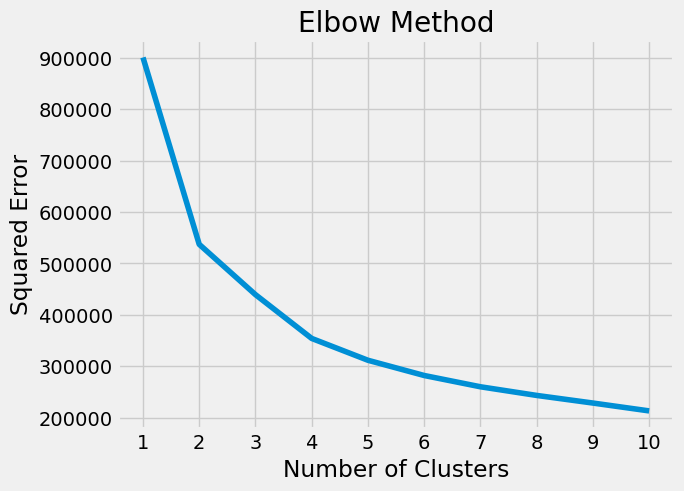

In [201]:
plt.style.use('fivethirtyeight')
plt.plot(range(1,11), squared_error)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Squared Error")
plt.title("Elbow Method")
plt.show()

In [202]:
kmeans = KMeans(init="random",
                n_clusters=2,
                n_init=10,
                max_iter=300,
                random_state=45
   )

In [203]:
model = kmeans.fit(df_normalized)
df['cluster'] = model.predict(df_normalized)
df.head(10)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total_TCP,Total_RTT,Total_TP,cluster
0,1.311450e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082010e+14,3.366496e+10,3.552120e+13,9.16456699548519E+015,...,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0,4.267498e+06,47.000000,67.0,0
1,1.311450e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082020e+14,3.368185e+10,3.579400e+13,L77566A,...,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0,4.267498e+06,70.000000,42.0,0
2,1.311450e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082000e+14,4.188282e+10,3.528150e+13,D42335A,...,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0,4.267498e+06,114.795706,15.0,0
3,1.311450e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082010e+14,4.188282e+10,3.535660e+13,T21824A,...,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0,4.267498e+06,114.795706,88.0,0
4,1.311450e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082010e+14,3.369980e+10,3.540700e+13,D88865A,...,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0,4.267498e+06,114.795706,15.0,0
5,1.311450e+19,4/12/2019 21:37,439.0,4/25/2019 8:08,553.0,1074638.0,2.082010e+14,3.366819e+10,3.529840e+13,T89132C,...,710293538.0,13167974.0,654978277.0,4436057.0,30307754.0,754452212.0,4.267498e+06,114.795706,124.0,0
6,1.311450e+19,4/13/2019 8:41,612.0,4/25/2019 8:16,168.0,1035261.0,2.082010e+14,3.366537e+10,8.676270e+13,9.16456701058919E+015,...,44796223.0,14084934.0,803653557.0,10649768.0,47925246.0,70562047.0,4.267498e+06,107.000000,60.0,0
7,1.304240e+19,4/14/2019 2:11,592.0,4/25/2019 2:26,512.0,951292.0,2.082010e+14,4.188282e+10,8.654640e+13,CELL_208_20_520025_1,...,748906189.0,16149622.0,537601820.0,7714657.0,58813016.0,775350343.0,1.539830e+05,57.000000,4114.0,1
8,1.311450e+19,4/14/2019 12:48,121.0,4/25/2019 10:22,960.0,941634.0,2.082010e+14,3.369874e+10,3.556240e+13,T42084A,...,821671285.0,6548349.0,172920486.0,14749031.0,42363146.0,861612261.0,4.267498e+06,114.795706,95.0,0
9,1.304240e+19,4/15/2019 0:32,0.0,4/25/2019 0:40,284.0,864482.0,2.082000e+14,3.365922e+10,3.557310e+13,L20434C,...,811355188.0,1591237.0,64856042.0,12815208.0,22417975.0,850570347.0,3.238627e+06,104.000000,6380.0,1
